In [ ]:
##########################################################################################
# Final Project
# This project will be taking the data from climate into below freezing temperatures
# and taking the times where Peyton Manning made completed passes in 
# uncovered arenas and compare it to the passes he makes 
# incomplete in the uncovered areans. This is going to answer the 
# question if Peyton Manning can make complete passes in cold weather.
# Reading in two different data sets. The first data set is 'Peytontemps.csv' which is
# all of the temperatures, dates, and location of the games. In order to solve the
# problem of which arena had a dome closed or open; if it was open I assumed the 
# temperature of 70 degrees (F). The second data set is 'Peytonpassing.csv' which is
# the date of the game, completion percentage and rate percentage.
# 
# By: Heather Bricca
#
# November 28,2018
#
#
# I have not given or received, nor have I tolerated others' use of unauthorized aid.
#
#
##########################################################################################

In [1]:
# Defining the dataset and importing the modules we will need.
import warnings
warnings.filterwarnings('ignore', 'numpy.dtype size changed')

from datetime import datetime
import numpy as np
import pandas as pd

In [2]:
# Importing the data sets here.
pass_percent = pd.read_csv('/home/hbricca/met330/final-project-hbricca/Peytonpassing.csv')
temps = pd.read_csv('/home/hbricca/met330/final-project-hbricca/Peytontemps.csv')

In [3]:
pass_percent.shape
pass_percent

,Year,Cmp,Rate
0,1998-09-06,56.76,58.6
1,1998-09-13,63.64,51.1
2,1998-09-20,45.45,39.3
3,1998-09-27,59.38,63.2
4,1998-10-04,52.17,66.8
5,1998-10-11,48.78,62.6
6,1998-10-18,60.00,117.5
7,1998-11-01,57.69,69.2
8,1998-11-08,52.38,47.7
9,1998-11-15,59.09,81.3


In [4]:
temps.shape
temps

#temps_values

,Year,Temperatures
0,1998-09-06,70
1,1998-09-13,70
2,1998-09-20,78
3,1998-09-27,70
4,1998-10-04,70
5,1998-10-11,70
6,1998-10-18,61
7,1998-11-01,70
8,1998-11-08,78
9,1998-11-15,70


In [5]:
# Defining the variables of years
years = temps.Year.values
print(years)
temp = temps.Temperatures.values
print(temp)

['1998-09-06' '1998-09-13' '1998-09-20' '1998-09-27' '1998-10-04'
 '1998-10-11' '1998-10-18' '1998-11-01' '1998-11-08' '1998-11-15'
 '1998-11-22' '1998-11-29' '1998-12-06' '1998-12-13' '1998-12-20'
 '1998-12-27' '1999-09-12' '1999-09-19' '1999-09-26' '1999-10-10'
 '1999-10-17' '1999-10-24' '1999-10-31' '1999-11-07' '1999-11-14'
 '1999-11-21' '1999-11-28' '1999-12-05' '1999-12-12' '1999-12-19'
 '1999-12-26' '2000-01-02' '2000-01-16' '2000-09-03' '2000-09-10'
 '2000-09-25' '2000-10-01' '2000-10-08' '2000-10-15' '2000-10-22'
 '2000-10-29' '2000-11-05' '2000-11-12' '2000-11-19' '2000-11-26'
 '2000-12-03' '2000-12-11' '2000-12-17' '2000-12-24' '2000-12-30'
 '2001-09-09' '2001-09-23' '2001-09-30' '2001-10-14' '2001-10-21'
 '2001-10-25' '2001-11-04' '2001-11-11' '2001-11-18' '2001-11-25'
 '2001-12-02' '2001-12-10' '2001-12-16' '2001-12-23' '2001-12-30'
 '2002-01-06' '2002-09-08' '2002-09-15' '2002-09-22' '2002-10-06'
 '2002-10-13' '2002-10-21' '2002-10-27' '2002-11-03' '2002-11-10'
 '2002-11-

In [6]:
# Now plotting to see if the correlation between warm temperatures and high pass percentages are correlated using
# A scatter plot where the green values are completion rate and red values are temperatures.
import matplotlib.pyplot as plt
completion = pass_percent.Cmp.values
plt.figure(1, figsize = (30,20))
plt.plot(years,temp, color = 'red' )
plt.plot(years, completion, color = 'green')
plt.xlabel('Years (YYYY/MM/DD)')
plt.xticks(np.arange(293), years[1:293], rotation=90, size=8)
plt.ylabel('Temperature [F] and Completion [%]')
plt.legend()
plt.savefig('tempandcompletionrate.png', dpi=150)
plt.show()

No handles with labels found to put in legend.


<Figure size 3000x2000 with 1 Axes>

In [7]:
# Calculting the median
median = np.median(temp)
#median

In [8]:
# Now making a definition to determine how many days he played in temperatures that were below 60 degrees
# with 60 degrees being the current benchmark of warmish temperatures in Fahrenheit.

def warm_days(temp):
    '''This is the defintion that will determine the number of days that Peyton Manning played
    in temperatures below 60 degrees
    
    where Y is the year,month,day
    and T is the temperatures during corresponding days
    Input:
    temp which is the temperatures from the temps data set
    
    Output:
    days which will be the number of days that were above 60
    and what those temperatures are
    
    if temp >= 60:
        print(temps)
    elif temp < 60:
        temp = false
    '''
    
# This is getting the length of temperatures and splitting it up in different parts so that the temperatures
# can be split up into warm days and cold day values.
low = 0
high = 292
tempsep = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
a = len(tempsep)

for t in range(293):
    if (temp[t] >= 60):
        tempsep[high] = temp[t]
        high = high - 1
    else:
        tempsep[low] = temp[t]
        low = low + 1
    
# Now saving it off to a variable so that we can graph it below.
#print (tempsep)
warmdays = tempsep[low:292]
colddays = tempsep[0:high]
print(warmdays)
print(colddays)

[74, 62, 69, 74, 83, 70, 83, 88, 63, 70, 69, 70, 72, 64, 71, 83, 82, 79, 64, 66, 70, 76, 67, 66, 70, 72, 63, 60, 93, 67, 62, 61, 71, 72, 83, 70, 86, 70, 70, 70, 70, 70, 70, 70, 73, 70, 72, 86, 87, 70, 66, 70, 70, 70, 62, 70, 70, 74, 60, 78, 60, 70, 65, 60, 70, 90, 72, 70, 79, 70, 70, 65, 70, 74, 68, 81, 70, 70, 79, 70, 70, 70, 70, 70, 70, 62, 70, 64, 76, 70, 70, 70, 78, 70, 66, 70, 64, 70, 70, 70, 70, 70, 62, 70, 70, 70, 64, 70, 70, 71, 70, 70, 70, 70, 70, 70, 70, 70, 69, 85, 70, 70, 73, 70, 70, 70, 81, 70, 70, 70, 70, 70, 70, 80, 70, 73, 70, 70, 70, 70, 70, 67, 70, 68, 83, 70, 70, 80, 70, 70, 70, 80, 70, 70, 70, 70, 71, 70, 61, 70, 70, 83, 70, 82, 70, 70, 70, 70, 80, 70, 70, 70, 70, 70, 70, 72, 61, 70, 81, 70, 70, 70, 60, 70, 70, 70, 70, 70, 88, 70, 70, 70, 76, 70, 69, 70, 70, 70, 62, 70, 64, 70, 70, 70, 70, 70, 73, 70, 78, 70, 61, 70, 70, 70, 78, 70]
[47, 58, 57, 29, 56, 53, 54, 28, 28, 55, 50, 54, 53, 43, 25, 36, 45, 35, 37, 46, 31, 39, 56, 43, 32, 26, 43, 41, 50, 58, 56, 34, 34, 57

In [9]:
# Now making a definition to determine the days in which the temperatures were cold on given dates.
def cold_days(temp):
    ''' This is the definition that will determine the days in which the temperature was below
    60 degrees.
    
    where Y is the year,month,day
    and T is the temperature values in Fahrenheit
    
    Input: all temperature values in the array
    Output: only the temperature values that are below 60 degrees
    
    if temp < 60:
        print(temp)

    '''
temp = temps.Temperatures.values
for l in range(293):
    if (temp[l] < 60):
        print('Cold days:', temp[l])
# Now saving it off to a variable so we can use it below in graph.
cold = temp[l]

Cold days: 47
Cold days: 58
Cold days: 57
Cold days: 29
Cold days: 56
Cold days: 53
Cold days: 54
Cold days: 28
Cold days: 28
Cold days: 55
Cold days: 50
Cold days: 54
Cold days: 53
Cold days: 43
Cold days: 25
Cold days: 36
Cold days: 45
Cold days: 35
Cold days: 37
Cold days: 46
Cold days: 31
Cold days: 39
Cold days: 56
Cold days: 43
Cold days: 32
Cold days: 26
Cold days: 43
Cold days: 41
Cold days: 50
Cold days: 58
Cold days: 56
Cold days: 34
Cold days: 34
Cold days: 57
Cold days: 37
Cold days: 55
Cold days: 52
Cold days: 49
Cold days: 41
Cold days: 41
Cold days: 55
Cold days: 55
Cold days: 14
Cold days: 51
Cold days: 37
Cold days: 43
Cold days: 57
Cold days: 48
Cold days: 39
Cold days: 56
Cold days: 56
Cold days: 57
Cold days: 51
Cold days: 52
Cold days: 40
Cold days: 9
Cold days: 57
Cold days: 52
Cold days: 28
Cold days: 56
Cold days: 15
Cold days: 55
Cold days: 41
Cold days: 53
Cold days: 38
Cold days: 32
Cold days: 32
Cold days: 57
Cold days: 51
Cold days: 37
Cold days: 38
Cold da

In [10]:
# Finding the completion percentage for Peyton Manning himself 
passes = pass_percent.Cmp.values

ave_pass = np.average(passes)
print(ave_pass)

65.51515358361776


In [13]:
# Finding the completion percentage for cold days by using the average value of 65.5 from above calculation.


# This part of code will separate each value in the 292 values of pass completion percentages to get each value
# in order to plot it on a graph.
begin = 0
end = 292
pass_sep = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sep_year = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

b = len(pass_sep)
for j in range(293):
    if (passes[j] >= 60):
        pass_sep[end] = passes[j]
        sep_year[end] = years[j]
        end = end - 1
    else:
        pass_sep[begin] = passes[j]
        sep_year[begin] = years[j]
        begin = begin + 1
    
# Now saving it off to a variable so that we can graph it below.
good_pass = pass_sep[begin:292]
bad_pass = pass_sep[0:end]
goodpass_year = sep_year[begin:292]
badpass_year = sep_year[0:end]
print(good_pass)
print(bad_pass)
print(goodpass_year)
print(badpass_year)

[72.41, 62.86, 62.96, 73.81, 60.0, 63.64, 70.0, 70.0, 80.0, 62.96, 70.45, 71.43, 84.62, 66.67, 65.96, 63.27, 80.77, 61.11, 69.39, 74.42, 69.44, 89.29, 62.75, 65.85, 66.1, 62.86, 60.0, 69.44, 68.18, 66.67, 78.57, 82.35, 86.49, 69.77, 64.29, 65.12, 79.31, 69.77, 60.71, 72.22, 71.05, 71.05, 77.14, 73.33, 80.0, 70.45, 78.95, 64.86, 73.08, 69.23, 65.85, 74.36, 71.43, 75.0, 64.58, 73.08, 60.78, 65.79, 71.74, 62.79, 76.92, 70.18, 68.89, 66.67, 68.18, 77.78, 66.67, 76.67, 64.86, 77.14, 70.97, 63.64, 68.0, 64.58, 67.65, 81.82, 75.61, 68.57, 60.87, 73.68, 100.0, 85.29, 75.68, 81.25, 71.43, 72.73, 65.22, 72.41, 63.41, 67.86, 73.53, 61.9, 61.22, 68.75, 87.5, 80.0, 76.47, 68.97, 68.75, 60.71, 62.16, 78.38, 74.07, 68.97, 66.67, 60.0, 65.79, 78.95, 77.78, 80.56, 75.0, 70.0, 69.23, 82.05, 71.43, 64.52, 70.0, 68.42, 60.98, 75.0, 66.67, 76.47, 60.0, 60.0, 74.29, 75.68, 77.78, 68.75, 74.19, 74.07, 82.61, 64.29, 81.82, 61.36, 60.61, 78.79, 75.76, 82.14, 60.71, 66.67, 79.31, 69.23, 61.54, 68.97, 70.0, 72.7

In [19]:
# Now we are goincoldyearsg to plot more data using the above calculations of warm days, cold days, good percentage
# and bad percentage rates.
low = 0
high = 292
tempsep = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
yearsep = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

a = len(tempsep)

for t in range(293):
    if (temp[t] >= 60):
        tempsep[high] = temp[t]
        yearsep[high] = years[t]
        high = high - 1
    else:
        tempsep[low] = temp[t]
        yearsep[low] = years[t]
        low = low + 1
    
# Now saving it off to a variable so that we can graph it below.
#print (tempsep)
warmdays = tempsep[low:292]
colddays = tempsep[0:high]
warmyears = yearsep[low:292]
coldyears = yearsep[0:high]
print(warmdays)
print(colddays)
print(warmyears)
print(coldyears)

[74, 62, 69, 74, 83, 70, 83, 88, 63, 70, 69, 70, 72, 64, 71, 83, 82, 79, 64, 66, 70, 76, 67, 66, 70, 72, 63, 60, 93, 67, 62, 61, 71, 72, 83, 70, 86, 70, 70, 70, 70, 70, 70, 70, 73, 70, 72, 86, 87, 70, 66, 70, 70, 70, 62, 70, 70, 74, 60, 78, 60, 70, 65, 60, 70, 90, 72, 70, 79, 70, 70, 65, 70, 74, 68, 81, 70, 70, 79, 70, 70, 70, 70, 70, 70, 62, 70, 64, 76, 70, 70, 70, 78, 70, 66, 70, 64, 70, 70, 70, 70, 70, 62, 70, 70, 70, 64, 70, 70, 71, 70, 70, 70, 70, 70, 70, 70, 70, 69, 85, 70, 70, 73, 70, 70, 70, 81, 70, 70, 70, 70, 70, 70, 80, 70, 73, 70, 70, 70, 70, 70, 67, 70, 68, 83, 70, 70, 80, 70, 70, 70, 80, 70, 70, 70, 70, 71, 70, 61, 70, 70, 83, 70, 82, 70, 70, 70, 70, 80, 70, 70, 70, 70, 70, 70, 72, 61, 70, 81, 70, 70, 70, 60, 70, 70, 70, 70, 70, 88, 70, 70, 70, 76, 70, 69, 70, 70, 70, 62, 70, 64, 70, 70, 70, 70, 70, 73, 70, 78, 70, 61, 70, 70, 70, 78, 70]
[47, 58, 57, 29, 56, 53, 54, 28, 28, 55, 50, 54, 53, 43, 25, 36, 45, 35, 37, 46, 31, 39, 56, 43, 32, 26, 43, 41, 50, 58, 56, 34, 34, 57

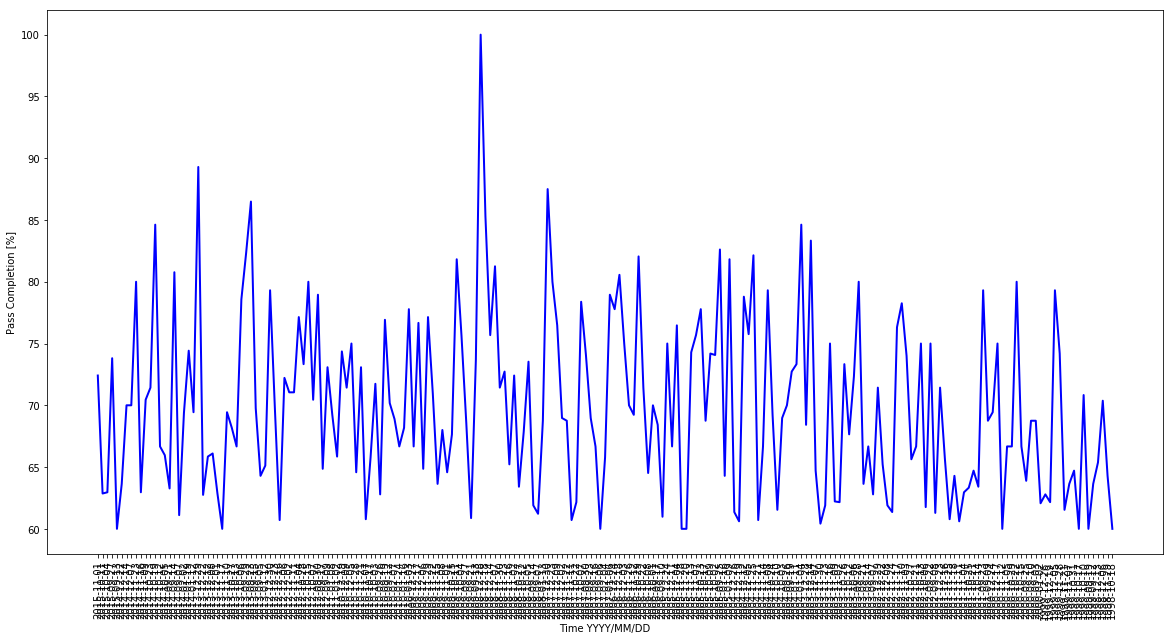

In [21]:
# Plotting the good pass years and pass percentages
import matplotlib.pyplot as plt
plt.figure(2, figsize = (20,10))
plt.plot(goodpass_year, good_pass,linewidth=2, markersize=12, color = 'blue')
plt.xlabel('Time YYYY/MM/DD')
plt.xticks(rotation=90)
plt.ylabel('Pass Completion [%]')
plt.savefig('goodpasspercentage.png', dpi=150)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (213,) and (216,)

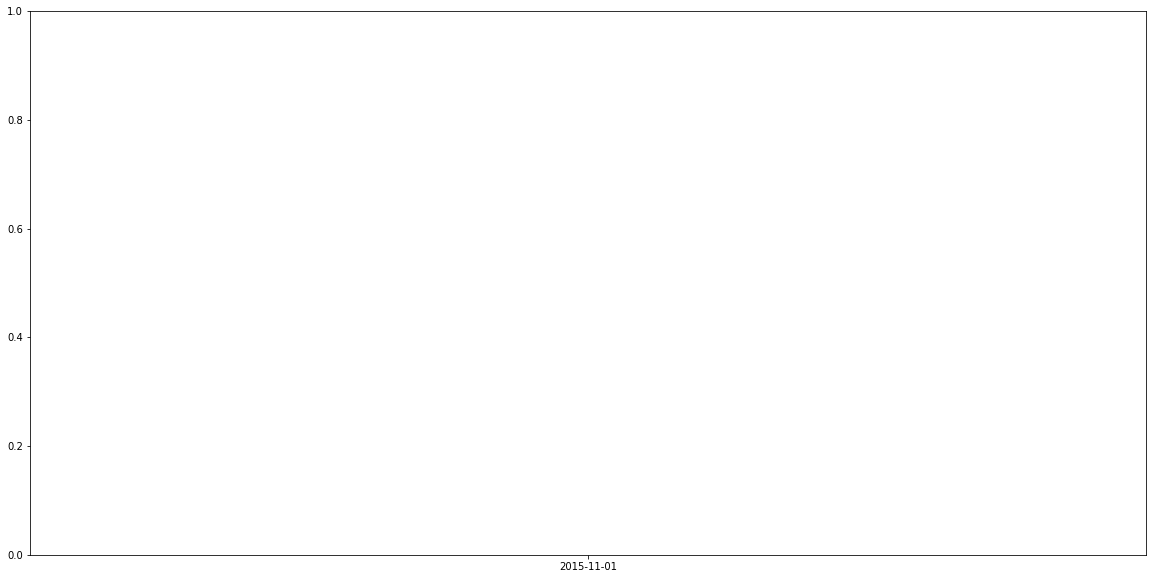

In [23]:
# Plotting the good pass years and temperatures
import matplotlib.pyplot as plt
plt.figure(3, figsize = (20,10))
plt.plot(goodpass_year, warmdays,linewidth=2, markersize=12, color = 'blue')
plt.xlabel('Time YYYY/MM/DD')
plt.xticks(rotation=90)
plt.ylabel('Temperature [F] and Pass Completion [%]')
plt.savefig('goodpasspercentage.png', dpi=150)
plt.show()

In [ ]:
# Plotting the bad pass years and pass percentages
import matplotlib.pyplot as plt
plt.figure(3, figsize = (20,10))
plt.plot(badpass_year, bad_pass,linewidth=2, markersize=12, color = 'orange')
plt.xlabel('Time YYYY/MM/DD')
plt.xticks(rotation=90)
plt.ylabel('Temperature [F] and Pass Completion [%]')
plt.savefig('badpasspercentage.png', dpi=150)
plt.show()